Install `R` with `sudo apt-get install r-base`.

In `R` console: 

```R
install.packages('IRkernel')
IRkernel::installspec(user = TRUE)
```


check for `ir` in `jupyter kernelspec list`

In [2]:
install.packages("ggplot2")
install.packages("dplyr")
install.packages("boot")

Installing package into ‘/home/lebrunb/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)



Installing package into ‘/home/lebrunb/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)

Installing package into ‘/home/lebrunb/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)



In [4]:
library(dplyr)
library(boot)
library(ggplot2)

# Sample data
data <- read.csv('llama-3-experiment-data.csv')
data$mbr <- as.logical(data$mbr)

data2 <- read.csv('llama-3.1-experiment-data.csv')
data2$mbr <- as.logical(data2$mbr)

data <- rbind(data, data2)

# Calculate proportions
proportions <- data %>%
  group_by(model, n_particles, LM) %>%
  summarize(proportion = mean(mbr))

# Bootstrap confidence intervals function
bootstrap_ci <- function(x, n_iterations=1000, ci=95) {
  boot_fn <- function(data, indices) {
    mean(data[indices])
  }
  
  results <- boot(x, boot_fn, R=n_iterations)
  ci <- boot.ci(results, type="perc")$perc[4:5]
  return(ci)
}

# Compute confidence intervals
conf_intervals <- data %>%
  group_by(model, n_particles, LM) %>%
  summarize(
    proportion = mean(mbr),
    ci = list(bootstrap_ci(mbr)),
    ci_lower = ci[[1]][1],
    ci_upper = ci[[1]][2]
  ) %>%
  ungroup()

Warning message in file(file, "rt"):
“cannot open file 'llama-3.1-experiment-data.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


In [3]:
proportions

model,n_particles,LM,proportion
<chr>,<int>,<chr>,<dbl>
Baseline LM,1,Meta-Llama-3-8B-Instruct,0.4829268
Baseline LM,10,Meta-Llama-3-8B-Instruct,0.5707317
Baseline LM,20,Meta-Llama-3-8B-Instruct,0.5658537
Baseline LM,50,Meta-Llama-3-8B-Instruct,0.5609756
Baseline LM,100,Meta-Llama-3-8B-Instruct,0.5658537
GenParse,1,Meta-Llama-3-8B-Instruct,0.4829268
GenParse,10,Meta-Llama-3-8B-Instruct,0.7609756
GenParse,20,Meta-Llama-3-8B-Instruct,0.7951220
GenParse,50,Meta-Llama-3-8B-Instruct,0.7853659


In [4]:
conf_intervals

model       n_particles LM                       proportion ci       
1  Baseline LM   1         Meta-Llama-3-8B-Instruct 0.4829268  0.4146341
2  Baseline LM  10         Meta-Llama-3-8B-Instruct 0.5707317  0.5560976
3  Baseline LM  20         Meta-Llama-3-8B-Instruct 0.5658537  0.4146341
4  Baseline LM  50         Meta-Llama-3-8B-Instruct 0.5609756  0.5560976
5  Baseline LM 100         Meta-Llama-3-8B-Instruct 0.5658537  0.4146341
6  GenParse      1         Meta-Llama-3-8B-Instruct 0.4829268  0.5560976
7  GenParse     10         Meta-Llama-3-8B-Instruct 0.7609756  0.4146341
8  GenParse     20         Meta-Llama-3-8B-Instruct 0.7951220  0.5560976
9  GenParse     50         Meta-Llama-3-8B-Instruct 0.7853659  0.4146341
10 GenParse    100         Meta-Llama-3-8B-Instruct 0.8097561  0.5560976
   <NA>      <NA>      <NA>      <NA>      <NA>      <NA>      <NA>     
1  0.5073171 0.5024390 0.4879288 0.4976849 0.4098800 0.7024390 0.7365854
2  0.6341463 0.6340224 0.6292683 0.6292683 0.5512195 0.8195122 0.8439024
3  0.5073171 0.5024390 0.4879288 0.4976849 0.4098800 0.7024390 0.7365854
4  0.6341463 0.6340224 0.6292683 0.6292683 0.5512195 0.8195122 0.8439024
5  0.5073171 0.5024390 0.4879288 0.4976849 0.4098800 0.7024390 0.7365854
6  0.6341463 0.6340224 0.6292683 0.6292683 0.5512195 0.8195122 0.8439024
7  0.5073171 0.5024390 0.4879288 0.4976849 0.4098800 0.7024390 0.7365854
8  0.6341463 0.6340224 0.6292683 0.6292683 0.5512195 0.8195122 0.8439024
9  0.5073171 0.5024390 0.4879288 0.4976849 0.4098800 0.7024390 0.7365854
10 0.6341463 0.6340224 0.6292683 0.6292683 0.5512195 0.8195122 0.8439024
   <NA>      <NA>      ci_lower  ci_upper 
1  0.7268293 0.7560976 0.4146341 0.5560976
2  0.8439024 0.8634146 0.5073171 0.6341463
3  0.7268293 0.7560976 0.5024390 0.6340224
4  0.8439024 0.8634146 0.4879288 0.6292683
5  0.7268293 0.7560976 0.4976849 0.6292683
6  0.8439024 0.8634146 0.4098800 0.5512195
7  0.7268293 0.7560976 0.7024390 0.8195122
8  0.8439024 0.8634146 0.7365854 0.8439024
9  0.7268293 0.7560976 0.7268293 0.8439024
10 0.8439024 0.8634146 0.7560976 0.8634146

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


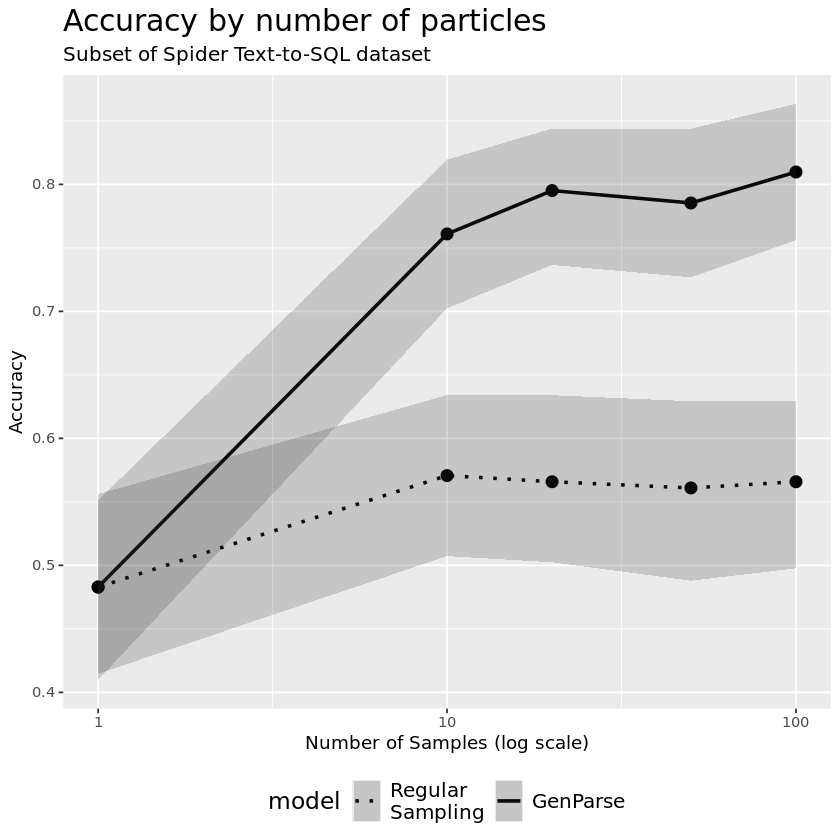

In [5]:
p <- ggplot(conf_intervals, aes(x = n_particles, y = proportion, linetype = model)) +
  geom_line(size = 1) +  # Add lines with size 1
  geom_point(size = 3) +  # Add points with size 3
  scale_x_log10() +  # Log scale for x-axis
  geom_ribbon(aes(ymin=ci_lower, ymax=ci_upper), alpha=0.2) +
  labs(title = "Accuracy by number of particles",
        subtitle = 'Subset of Spider Text-to-SQL dataset',
        x = "Number of Samples (log scale)",
        y = "Accuracy",
       color = "Sampling \n Method") +
  theme(
    'dark',
    legend.position = "bottom",  # Move legend to the bottom
    plot.title = element_text(size = 18),
    plot.subtitle = element_text(size = 12),
    legend.title = element_text(size = 14),  # Increase legend title text size
    legend.text = element_text(size = 12),   # Increase legend text size
  ) +
  scale_linetype_manual(values = c("Baseline LM" = "dotted", "GenParse" = "solid"),
                     labels = c("Regular\nSampling", "GenParse")) +
  guides(
    color = guide_legend(nrow = 2),     # Arrange color legend items in 2 rows
    #linetype = guide_legend(nrow = 2)   # Arrange linetype legend items in 2 rows
  )

print(p)

`summarise()` has grouped output by 'model', 'n_particles'. You can override
using the `.groups` argument.


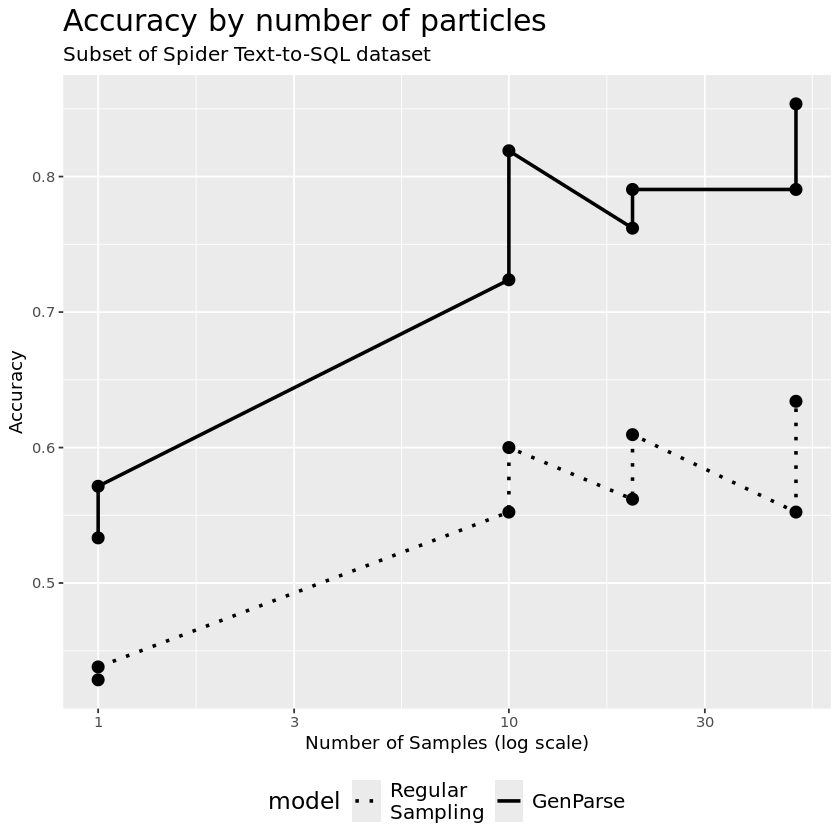

In [9]:
# Sample data
data <- read.csv('experiment_data.csv')
data$mbr <- as.logical(data$mbr)

# Calculate proportions
proportions <- data %>%
  group_by(model, n_particles, LM) %>%
  summarize(proportion = mean(mbr))

p <- ggplot(proportions, aes(x = n_particles, y = proportion, linetype = model)) +
  geom_line(size = 1) +  # Add lines with size 1
  geom_point(size = 3) +  # Add points with size 3
  scale_x_log10() +  # Log scale for x-axis
  #geom_ribbon(aes(ymin=ci_lower, ymax=ci_upper), alpha=0.2) +
  labs(title = "Accuracy by number of particles",
        subtitle = 'Subset of Spider Text-to-SQL dataset',
        x = "Number of Samples (log scale)",
        y = "Accuracy",
       color = "Sampling \n Method") +
  theme(
    'dark',
    legend.position = "bottom",  # Move legend to the bottom
    plot.title = element_text(size = 18),
    plot.subtitle = element_text(size = 12),
    legend.title = element_text(size = 14),  # Increase legend title text size
    legend.text = element_text(size = 12),   # Increase legend text size
  ) +
  scale_linetype_manual(values = c("Baseline LM" = "dotted", "GenParse" = "solid"),
                     labels = c("Regular\nSampling", "GenParse")) +
  guides(
    color = guide_legend(nrow = 2),     # Arrange color legend items in 2 rows
    #linetype = guide_legend(nrow = 2)   # Arrange linetype legend items in 2 rows
  )

print(p)

In [6]:
p <- ggplot(proportions, aes(x = n_particles, y = proportion, linetype = model, color = LM)) +
  geom_line(size = 1) +  
  geom_point(size = 3) + 
  scale_x_log10() + 
  geom_ribbon(aes(ymin=ci_lower, ymax=ci_upper), alpha=0.2) +
  labs(title = "Accuracy by number of particles",
        subtitle = 'Subset of Spider Text-to-SQL dataset',
        x = "Number of Samples (log scale)",
        y = "Accuracy",
       color = "Sampling \n Method",
       linetype = "Language \n Model") +
  theme(
    'dark',
    legend.position = "bottom",  # Move legend to the bottom
    plot.title = element_text(size = 18),
    plot.subtitle = element_text(size = 12),
    legend.title = element_text(size = 14),  # Increase legend title text size
    legend.text = element_text(size = 12),   # Increase legend text size
  ) +
  scale_linetype_manual(values = c("Baseline LM" = "dotted", "GenParse" = "solid"),
                     labels = c("Regular\nSampling", "GenParse")) +
  scale_color_manual(values = c("Meta-Llama-3-8B-Instruct" = "red", "Meta-Llama-3.1-8B-Instruct" = "blue"),
                        labels = c("Llama 3 8B", "Llama 3.1 8B")) +
  guides(
    color = guide_legend(nrow = 2),     # Arrange color legend items in 2 rows
    linetype = guide_legend(nrow = 2)   # Arrange linetype legend items in 2 rows
  )

print(p)

ERROR: [1m[33mError[39m in `geom_ribbon()`:[22m
[1m[22m[33m![39m Problem while computing aesthetics.
[36mℹ[39m Error occurred in the 3rd layer.
[1mCaused by error in `FUN()`:[22m
[33m![39m object 'ci_lower' not found


In [33]:
log_ml

n_particles,LM,log_ml
<int>,<chr>,<dbl>
1,Meta-Llama-3-8B-Instruct,NA
10,Meta-Llama-3-8B-Instruct,NA
20,Meta-Llama-3-8B-Instruct,NA
50,Meta-Llama-3-8B-Instruct,NA


`summarise()` has grouped output by 'n_particles', 'model'. You can override
using the `.groups` argument.


Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_point()`).”


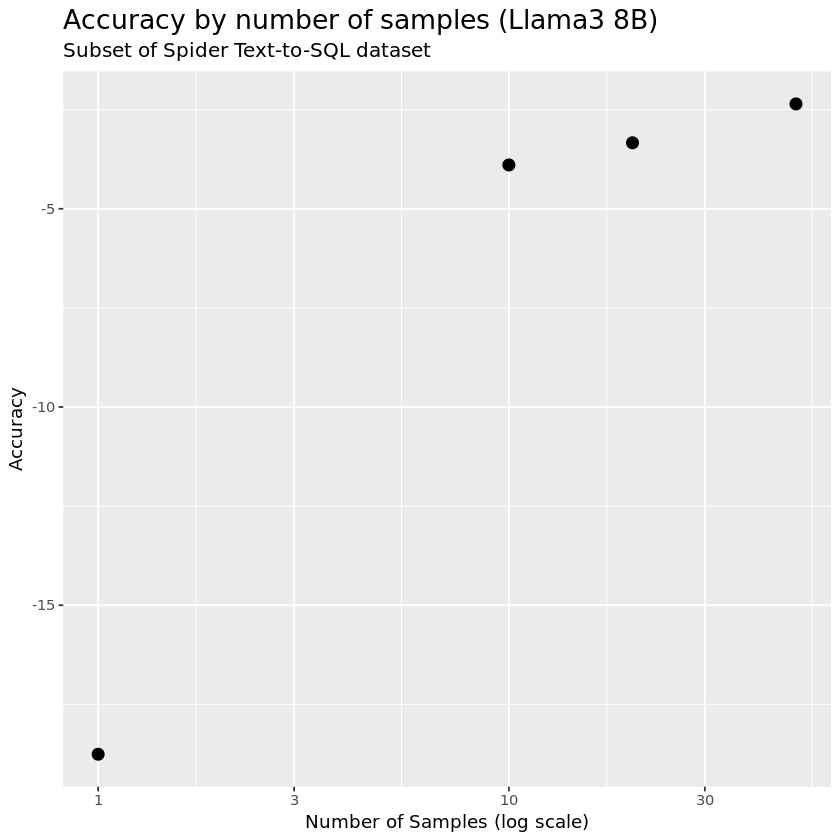

In [34]:
# Calculate proportions
log_ml <- data %>%
  group_by(n_particles, model, LM) %>%
  summarize(log_ml = mean(log_ml))


log_ml %>% ggplot(aes(x=n_particles, y=log_ml)) +
    geom_line() +
    geom_point() +
    geom_line(size = 1) +
    geom_point(size = 3) +
    scale_x_log10() + 
    #geom_ribbon(aes(ymin=ci_lower, ymax=ci_upper), alpha=0.2) +
    labs(
        title = "Accuracy by number of samples (Llama3 8B)",
        subtitle = 'Subset of Spider Text-to-SQL dataset',
        x = "Number of Samples (log scale)",
        y = "Accuracy",
    ) +
    theme(
        'dark',
        plot.title = element_text(size = 16, family = "roboto"),  # Title size
        plot.subtitle = element_text(size = 12, family = "roboto")  # Subtitle size
    ) + theme(
        legend.position = "bottom"
    )

In [4]:
proportions

model,n_particles,proportion
<chr>,<int>,<dbl>
Meta-Llama-3-8B-Instruct,1,NA
Meta-Llama-3-8B-Instruct,10,NA
Meta-Llama-3-8B-Instruct,20,NA
Meta-Llama-3-8B-Instruct,50,NA
